In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

# **Pre-Processing :** 

In [ ]:
data,target = fetch_california_housing(as_frame=True,return_X_y=True)

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


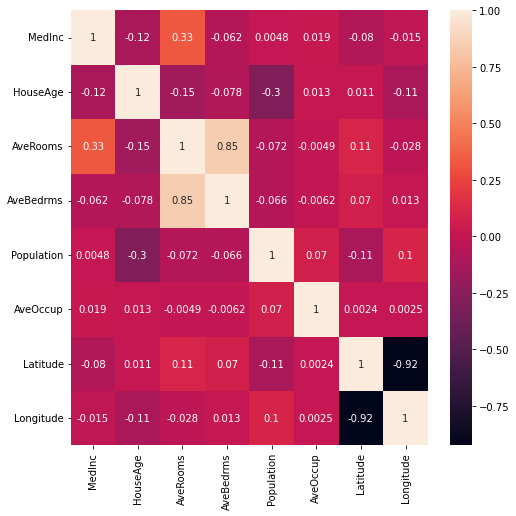

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True);

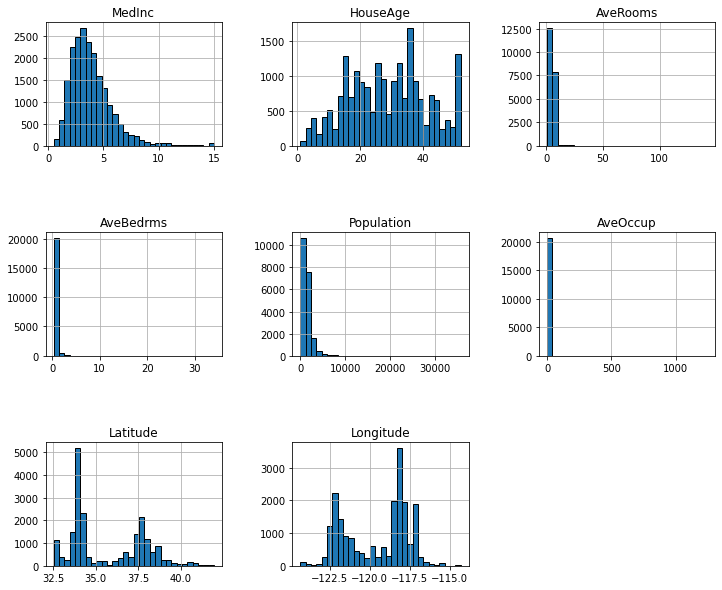

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The median income is a distribution with a long tail. This means that people's salaries are more or less normally distributed, but there are some people who make high salaries.
Average house age has uniform distribution


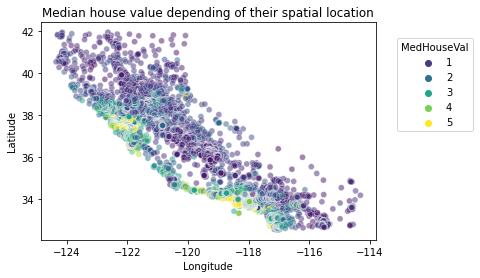

In [534]:
import seaborn as sns

sns.scatterplot(data=data, x="Longitude", y="Latitude",
                hue = target, 
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of their spatial location")

The longitude and latitude contain geographical information. Using this feature in combination could help us determine whether certain areas are associated with high-valued properties

 0.15 to 5.0 (in units of 100,000 USD)

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.8/dist-packa

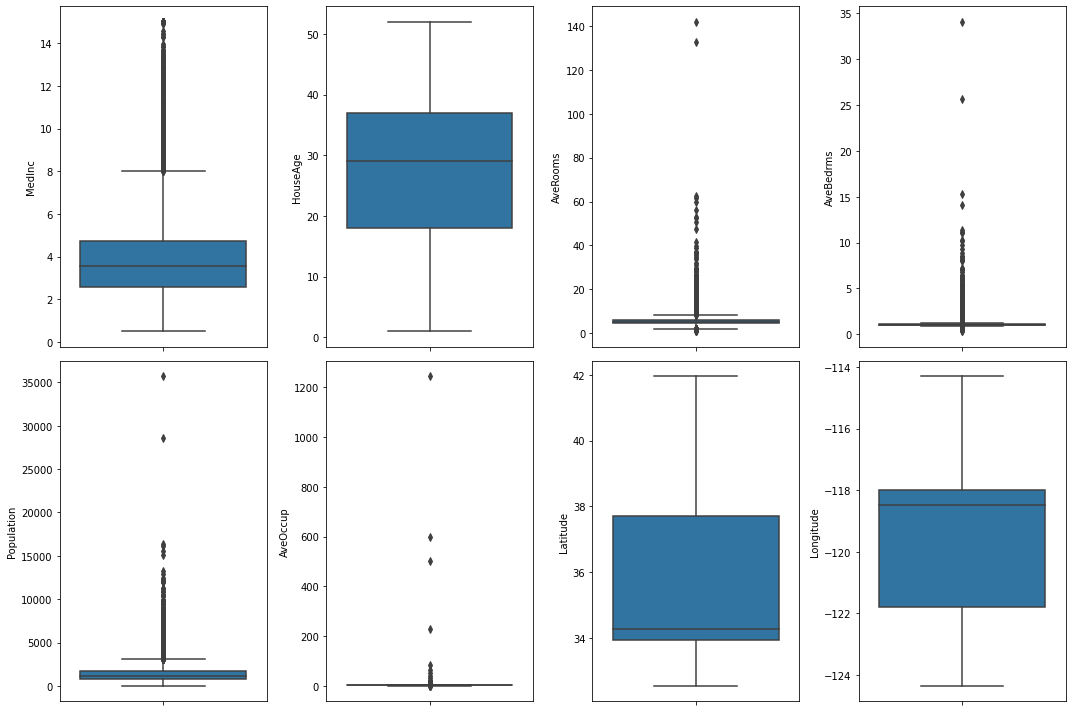

In [ ]:
num_col = data.select_dtypes(include = ['float64', 'int']).columns
len_numeric_columns = len(num_col)

fig = plt.figure(figsize = (15,10))

n_cols = 4

n_plot_rows = len_numeric_columns//n_cols
n_plot_rows


for i, column in enumerate(num_col):
    ax = fig.add_subplot(n_plot_rows, n_cols, i+1)
    sns.boxplot(y = data[column], orient = 'h', ax = ax)

fig.tight_layout()

The outliers are mainly due to not having a normal disturbution
1. The box in each box plot represents the middle 50% of the data, with the lower edge of the box being the 25th percentile (Q1) and the upper edge of the box being the 75th percentile (Q3).
2. The median is represented by a horizontal line inside the box.
3. The whiskers extend from the box to the minimum and maximum values of the data, excluding any outliers.
4. Outliers are plotted individually as dots outside the whiskers.
5. By examining the box plots, you can gain insights into the distribution, central tendency, and spread of each numeric variable in the California housing dataset.

In [ ]:
'''Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outliers]
target = target[~outliers]'''

'Q1 = data.quantile(0.25)\nQ3 = data.quantile(0.75)\nIQR = Q3 - Q1\noutliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)\ndata = data[~outliers]\ntarget = target[~outliers]'

In [ ]:
'''num_col = data.select_dtypes(include = ['float64', 'int']).columns
len_numeric_columns = len(num_col)

fig = plt.figure(figsize = (15,10))

n_cols = 4

n_plot_rows = len_numeric_columns//n_cols
n_plot_rows


for i, column in enumerate(num_col):
    ax = fig.add_subplot(n_plot_rows, n_cols, i+1)
    sns.boxplot(y = data[column], orient = 'h', ax = ax)

fig.tight_layout()'''

"num_col = data.select_dtypes(include = ['float64', 'int']).columns\nlen_numeric_columns = len(num_col)\n\nfig = plt.figure(figsize = (15,10))\n\nn_cols = 4\n\nn_plot_rows = len_numeric_columns//n_cols\nn_plot_rows\n\n\nfor i, column in enumerate(num_col):\n    ax = fig.add_subplot(n_plot_rows, n_cols, i+1)\n    sns.boxplot(y = data[column], orient = 'h', ax = ax)\n\nfig.tight_layout()"

Review of data post removing of outliers - we decided not to go ahead with removing those outliers as a deal of data would have been lost.


The error also increased which might have been due to reduced dataset.

# **Splitting of Data :**

In [ ]:
X = data
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##**Ordinary** **Least Squares (OLS)**

In [ ]:
from sklearn.linear_model import LinearRegression # had to change all X and Y values to train and test
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.6063065280380298

In [ ]:
reg.intercept_

-37.11201629403184

In [ ]:
reg.coef_

array([ 4.33519552e-01,  9.64681372e-03, -1.00928832e-01,  6.00826966e-01,
       -5.07214855e-06, -4.69957904e-03, -4.24702879e-01, -4.37140713e-01])

In [ ]:
y_predicted = reg.predict(X_test)

In [ ]:
reg_score = reg.score(X_test,y_test)
reg_score

0.6051744845195988

In [ ]:
ms_ols= mean_squared_error(y_test,y_predicted)

In [ ]:
ms_ols

0.5216891008466185

In [ ]:
print("Variance : ", metrics.explained_variance_score(y_test,y_predicted))

Variance :  0.6051992044755226


##**LASSO** **Regressor (L1)**

In [ ]:
from sklearn import linear_model

In [ ]:
clf = linear_model.Lasso() 

In [ ]:
clf.fit(X_train, y_train, sample_weight=None, check_input=True)

Lasso()

In [ ]:
print(clf.coef_)

[ 1.45667299e-01  5.87932221e-03  0.00000000e+00 -0.00000000e+00
 -8.76498681e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


In [ ]:
print(clf.intercept_)

1.3493689165137024


In [ ]:
print("Score for train : ", clf.score(X_train, y_train))
print("Score for test : ", clf.score(X_test, y_test))
clf_score = clf.score(X_test, y_test)

Score for train :  0.28521023628641484
Score for test :  0.2874166117278594


In [ ]:
y_predi=clf.predict(X_test)

In [ ]:
clf.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
ms_lasso= mean_squared_error(y_test,y_predi)

In [ ]:
ms_lasso

0.9415475255027761

In [ ]:
print("Variance : ", metrics.explained_variance_score(y_test,y_predi))

Variance :  0.28742187491630566


## **3) Ridge Regressor (L2)**

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

clf_ridge = Ridge(alpha=1.0)
clf_ridge.fit(X_train, y_train)

Ridge()

In [ ]:
clf_ridge.score(X_train, y_train, sample_weight=None)

0.6063064926776274

In [ ]:
predicted = clf_ridge.predict(X_test)
print("Score for test set : ", clf_ridge.score(X_test,y_test))
ridge_score = clf_ridge.score(X_test,y_test)

Score for test set :  0.6051633242093994


In [ ]:
clf_ridge.coef_

array([ 4.33407647e-01,  9.64886798e-03, -1.00712547e-01,  5.99693194e-01,
       -5.06415859e-06, -4.69918114e-03, -4.24677408e-01, -4.37099661e-01])

In [ ]:
clf_ridge.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
print(clf_ridge.intercept_)

-37.10758460669688


In [ ]:
imp_ridge = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": clf_ridge.coef_})
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
3,AveBedrms,0.599693
0,MedInc,0.433408
1,HouseAge,0.009649
4,Population,-0.000005
5,AveOccup,-0.004699
2,AveRooms,-0.100713
6,Latitude,-0.424677
7,Longitude,-0.437100


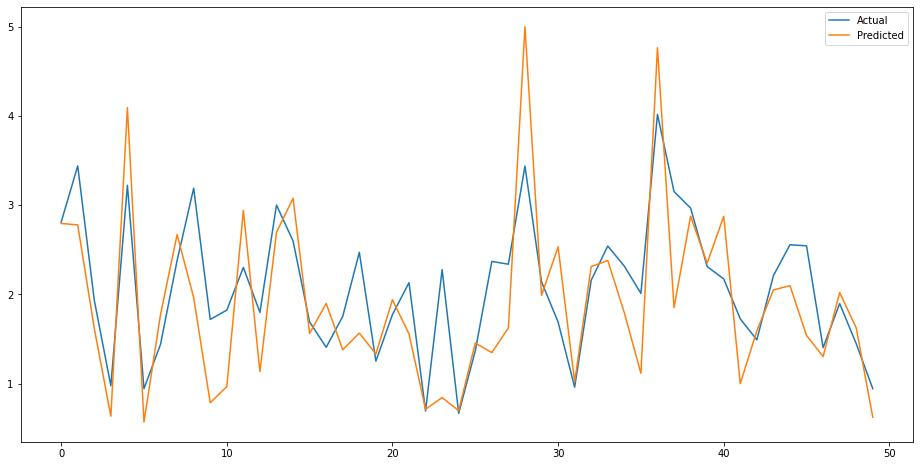

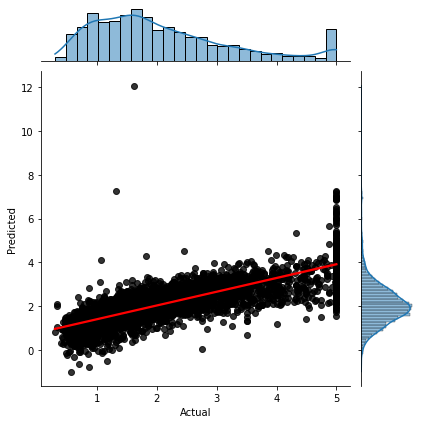

In [ ]:
test = pd.DataFrame({'Predicted':predicted,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg', scatter_kws = {"color":"black"}, line_kws = {"color":"red"})

In [ ]:
df= pd.DataFrame({'Actual':y_test,'Predictions':predicted})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
11816,2.128,1.36
10863,1.849,2.16
19093,2.049,2.56
7233,1.537,2.02
18407,2.240,3.01


In [ ]:
from sklearn import metrics 

In [ ]:
ms_ridge= mean_squared_error(y_test,predicted)

In [536]:
print("Variance : ", metrics.explained_variance_score(y_test,predicted))
print("Mean Square error : ", metrics.mean_squared_error(y_test,predicted))

Variance :  0.5999653500883473
Mean Square error :  0.5350372214801733


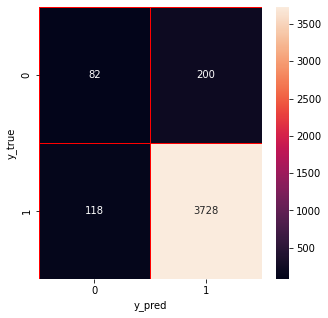

In [ ]:
from sklearn.metrics import confusion_matrix

cutoff = 0.7                                 # decide on a cutoff limit
y_pred_classes = np.zeros_like(predicted)    # initialise a matrix full with zeros
y_pred_classes[predicted > cutoff] = 1       # add a 1 if the cutoff was breached

# have to do the same for the actual values too:
y_test_classes = np.zeros_like(predicted)
y_test_classes[y_test > cutoff] = 1

cm=confusion_matrix(y_test_classes,y_pred_classes)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

*   TP : 3728 values
*   TN : 82 values
*   FP : 118 values
*   FN : 200 values

##**4) Elastic Regressor (L1 & L2)**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [ ]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

ElasticNet(random_state=0)

In [ ]:
print(regr.coef_)

[ 2.53719637e-01  1.14673905e-02  0.00000000e+00 -0.00000000e+00
  7.84326688e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


In [ ]:
regr_predicted = regr.predict(X_test)

In [ ]:
print("Score for train set : ", regr.score(X_train,y_train))
print("Score for test set : ", regr.score(X_test,y_test))
elastic_score = regr.score(X_test,y_test)

Score for train set :  0.42327543490378916
Score for test set :  0.42523238723405143


In [ ]:
print(regr.intercept_)

0.7466788993076583


In [ ]:
regr.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': 0,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
imp_ridge = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": regr.coef_})
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
0,MedInc,0.253720
1,HouseAge,0.011467
4,Population,0.000008
2,AveRooms,0.000000
3,AveBedrms,-0.000000
5,AveOccup,-0.000000
6,Latitude,-0.000000
7,Longitude,-0.000000


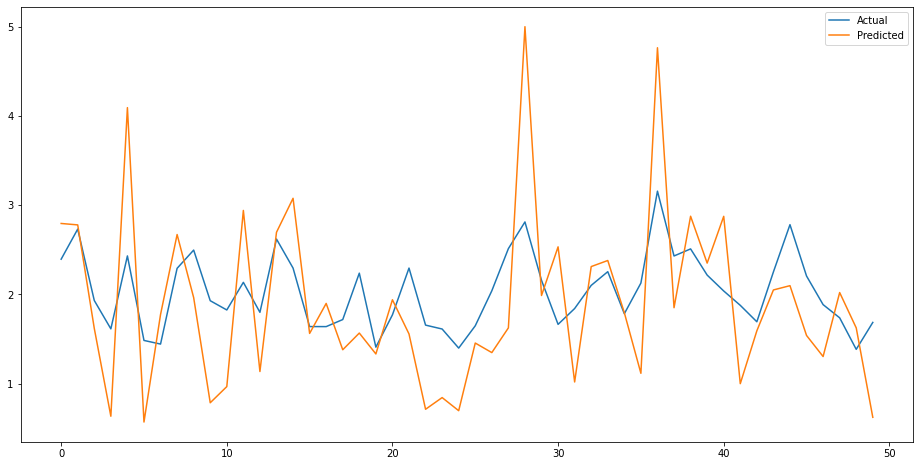

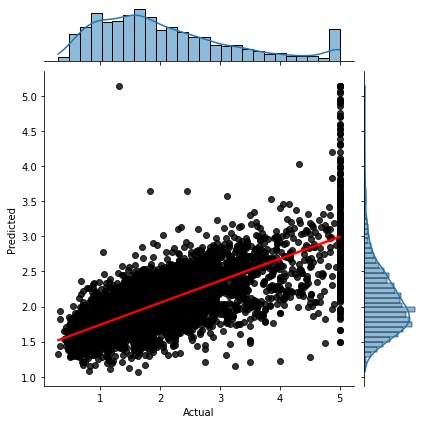

In [ ]:
test = pd.DataFrame({'Predicted':regr_predicted,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg', scatter_kws = {"color":"black"}, line_kws = {"color":"red"})

In [ ]:
df= pd.DataFrame({'Actual':y_test,'Predictions':regr_predicted})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
11816,2.128,2.11
10863,1.849,2.11
19093,2.049,2.29
7233,1.537,2.00
18407,2.240,2.49


In [ ]:
ms_elastic= mean_squared_error(y_test,regr_predicted)

In [537]:
print("Variance : ", metrics.explained_variance_score(y_test,regr_predicted))
print("Mean Square error : ", metrics.mean_squared_error(y_test,regr_predicted))

Variance :  0.43753253367087896
Mean Square error :  0.752288817090759


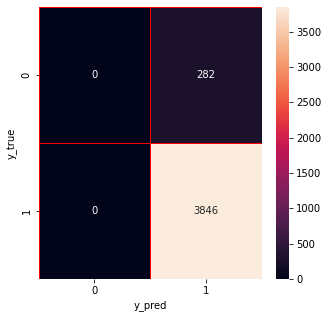

In [ ]:
cutoff = 0.7                                      # decide on a cutoff limit
y_pred_regr_classes = np.zeros_like(regr_predicted)    # initialise a matrix full with zeros
y_pred_regr_classes[regr_predicted > cutoff] = 1       # add a 1 if the cutoff was breached

# have to do the same for the actual values too:
y_test_regr_classes = np.zeros_like(regr_predicted)
y_test_regr_classes[y_test > cutoff] = 1

cm=confusion_matrix(y_test_regr_classes,y_pred_regr_classes)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

*   TP : 3846 values
*   FN : 282 values
*   FP : 0 values
*   TN : 0 values

# **Normalization & Tuning :**

**Tuning the OLS model :**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)

print("The score for the training set : ",ols_model.score(X_test_scaled,y_test))
print("Intercept : ",ols_model.intercept_)

The score for the training set :  0.6051744845195979
Intercept :  2.0700392829457392


In [ ]:
param_grid = {
    "fit_intercept": [True, False],
    "normalize": [True, False],
    "copy_X": [True, False]
}
gridSearch = GridSearchCV(ols_model, param_grid, cv=5)
gridSearch.fit(X_train_scaled, y_train)

In [ ]:
print(gridSearch.best_params_)
print(gridSearch.score(X_test_scaled, y_test))
score_gridSearch_ols = gridSearch.score(X_test_scaled, y_test)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.6051744845195979


In [ ]:
ols_grid_pred = gridSearch.predict(X_test_scaled)

In [ ]:
mse_ols = mean_squared_error(y_test, ols_grid_pred)

In [ ]:
print("Variance : ", metrics.explained_variance_score(y_test,ols_grid_pred))
print("Mean Absolute error : ", metrics.mean_absolute_error(y_test,ols_grid_pred))

Variance :  0.6051992044755217
Mean Absolute error :  0.5345760213795014


**Tuning the Lassos model :**

In [ ]:
param_grid = {
    "alpha": [0.1, 0.5, 1.0, 5.0, 10.0],
    "fit_intercept": [True, False],
    "normalize": [True, False],
    "max_iter": [100, 500, 1000, 5000]
}

In [ ]:
lasso_model = linear_model.Lasso()

lasso_model.fit(X_train_scaled, y_train)

gridSearch = GridSearchCV(lasso_model, param_grid, cv=5)
gridSearch.fit(X_train_scaled, y_train)

In [ ]:
print("best_params_ : ",gridSearch.best_params_)

best_params_ :  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 100, 'normalize': False}


In [ ]:
print("Score for test set after normalization : ",gridSearch.score(X_test_scaled, y_test))
print("Intercept : ",lasso_model.intercept_)
grid_lassos_score = gridSearch.score(X_test_scaled, y_test)

Score for test set after normalization :  0.49574858073299866
Intercept :  2.070039282945736


In [ ]:
lassos_grid_pred = gridSearch.predict(X_test_scaled)

In [ ]:
mse_lasso = mean_squared_error(y_test, lassos_grid_pred)

In [ ]:
print("Variance : ", metrics.explained_variance_score(y_test,lassos_grid_pred))
print("Mean Absolute error : ", metrics.mean_absolute_error(y_test,lassos_grid_pred))

Variance :  0.4957532883293947
Mean Absolute error :  0.6169960100502659


**Tuning the Ridge Regressor (L2) model :**

In [ ]:
ridge_reg = Ridge()

In [ ]:
param_grid = {
    "alpha": [0.1,0.5,1.0,10.0],
}

In [ ]:
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 10.0]})

In [ ]:
best_params = grid_search.best_params_
print(best_params)

{'alpha': 10.0}


In [ ]:
ridge_reg = Ridge(alpha=best_params['alpha'])
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=10.0)

In [ ]:
y_pred = grid_search.predict(X_test_scaled)

In [ ]:
print(y_pred)

[1.37058317 2.16292488 2.56256651 ... 2.87310524 1.73369429 2.20684336]


In [ ]:
from sklearn.metrics import mean_squared_error
mse_ridge = mean_squared_error(y_test, y_pred)

In [ ]:
print("Best Hyperparameters:", best_params)
print("MSE:", mse_ridge)

Best Hyperparameters: {'alpha': 10.0}
MSE: 0.5217121484185445


In [ ]:
print("Score for test set after normalization : ",grid_search.score(X_test_scaled, y_test))
ridge_score_grid = grid_search.score(X_test_scaled, y_test)

Score for test set after normalization :  0.6051570416221881


**Tuning the Elastic Regressor (L1 & L2) model :**

In [ ]:
elastic_reg = ElasticNet()

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [ ]:
grid_search = GridSearchCV(elastic_reg, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_params

{'alpha': 0.01, 'l1_ratio': 0.9}

In [ ]:
elastic_reg = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
elastic_reg.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.9)

In [ ]:
y_pred = grid_search.predict(X_test_scaled)

In [ ]:
y_pred

array([1.48782777, 2.18244516, 2.58753961, ..., 2.81061056, 1.64918643,
       2.24283305])

In [ ]:
mse_elastic= mean_squared_error(y_test, y_pred)

In [ ]:
print("Best Hyperparameters:", best_params)
print("MSE:", mse_elastic)

Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.9}
MSE: 0.5279113781965911


In [ ]:
print("Score for test set after normalization : ",grid_search.score(X_test_scaled, y_test))
elastic_grid_score = grid_search.score(X_test_scaled, y_test)

Score for test set after normalization :  0.6004653313895484


In [ ]:
mse_values = {"Models" : ['OLS', 'Lassos', 'Ridge', 'Elastic'], 'Score_before ': [reg_score, clf_score, ridge_score, elastic_score],
              'Score_after' : [score_gridSearch_ols, grid_lassos_score, ridge_score_grid, elastic_grid_score]}

df = pd.DataFrame(mse_values)
df

,Models,Score_before,Score_after
0,OLS,0.605174,0.605174
1,Lassos,0.287417,0.495749
2,Ridge,0.605163,0.605157
3,Elastic,0.425232,0.600465


THese are the scores for the models before and after performing the tuning

In [ ]:
mse_values = {"Models" : ['OLS', 'Lassos', 'Ridge', 'Elastic'],'MSE BEFORE' : [ms_ols, ms_lasso, ms_ridge, ms_elastic],
              'MSE AFTER' : [mse_ols, mse_lasso, mse_ridge, mse_elastic]}

df3 = pd.DataFrame(mse_values)
df3

,Models,MSE BEFORE,MSE AFTER
0,OLS,0.521689,0.521689
1,Lassos,0.941548,0.666275
2,Ridge,0.521704,0.521712
3,Elastic,0.759449,0.527911
